<a href="https://colab.research.google.com/github/NestisN/DSE-3-P1/blob/main/bak-Project1-Data_Analyst_jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/DSE3"

DataAnalyst.csv


In [4]:
data=pd.read_csv('/content/drive/My Drive/DSE3/DataAnalyst.csv', index_col=0)

In [5]:
data.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1


In [6]:
data.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [7]:
df = pd.DataFrame(data,columns=['Company Name'])

In [8]:
print(df)

                                 Company Name
0              Vera Institute of Justice\n3.2
1     Visiting Nurse Service of New York\n3.8
2                            Squarespace\n3.4
3                               Celerity\n4.1
4                                FanDuel\n3.9
...                                       ...
2248                       Avacend, Inc.\n2.5
2249                   Arrow Electronics\n2.9
2250                                 Spiceorb
2251         Contingent Network Services\n3.1
2252                          SCL Health\n3.4

[2253 rows x 1 columns]


In [9]:
print(df[df["Company Name"].isnull()])

     Company Name
1860          NaN


In [12]:
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

In [43]:
data.isnull().sum()

Job Title               0
Salary Estimate         1
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
Min_Salary              0
Max_Salary              0
dtype: int64

In [45]:
df2= pd.DataFrame(data)

In [47]:
df2.dropna(subset=["Salary Estimate"], inplace=True)

In [48]:
df2.isnull().sum()

Job Title               0
Salary Estimate         0
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1731
Easy Apply           2172
Min_Salary              0
Max_Salary              0
dtype: int64

In [50]:
df2["Salary Estimate"]

0        $37K-$66K 
1        $37K-$66K 
2        $37K-$66K 
3        $37K-$66K 
4        $37K-$66K 
           ...     
2248    $78K-$104K 
2249    $78K-$104K 
2250    $78K-$104K 
2251    $78K-$104K 
2252    $78K-$104K 
Name: Salary Estimate, Length: 2252, dtype: object

In [49]:
data['Salary Estimate'],_=data['Salary Estimate'].str.split('(', 1).str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



ValueError: ignored

In [14]:
data['Min_Salary'],data['Max_Salary']=data['Salary Estimate'].str.split('-').str
data['Min_Salary']=data['Min_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
data['Max_Salary']=data['Max_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [51]:
df2['Min_Salary'],df2['Max_Salary']=df2['Salary Estimate'].str.split('-').str
df2['Min_Salary']=df2['Min_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
df2['Max_Salary']=df2['Max_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [17]:
salary=pd.DataFrame(data, columns=['Salary Estimate','Min_Salary', 'Max_Salary'])

In [35]:
salary

,Salary Estimate,Min_Salary,Max_Salary
0,$37K-$66K,37,66
1,$37K-$66K,37,66
2,$37K-$66K,37,66
3,$37K-$66K,37,66
4,$37K-$66K,37,66
...,...,...,...
2248,$78K-$104K,78,104
2249,$78K-$104K,78,104
2250,$78K-$104K,78,104
2251,$78K-$104K,78,104


In [36]:
print(data['Salary Estimate'].unique())

['$37K-$66K ' '$46K-$87K ' '$51K-$88K ' '$51K-$87K ' '$59K-$85K '
 '$43K-$76K ' '$60K-$110K ' '$41K-$78K ' '$45K-$88K ' '$73K-$127K '
 '$84K-$90K ' '$27K-$52K ' '$42K-$74K ' '$77K-$132K ' '$98K-$114K '
 '$48K-$96K ' '$26K-$47K ' '$31K-$59K ' '$47K-$81K ' '$43K-$69K '
 '$49K-$112K ' '$30K-$54K ' '$55K-$103K ' '$37K-$70K ' '$57K-$103K '
 '$35K-$45K ' '$42K-$66K ' '$65K-$81K ' '$113K-$132K ' '$42K-$63K '
 '$60K-$66K ' '$73K-$82K ' '$67K-$92K ' '$42K-$76K ' '$97K-$129K '
 '$68K-$87K ' '$29K-$38K ' '$47K-$76K ' '$74K-$123K ' '$53K-$94K '
 '$46K-$102K ' '$43K-$94K ' '$45K-$78K ' '$38K-$68K ' '$37K-$44K '
 '$64K-$113K ' '$50K-$93K ' '$37K-$68K ' '$73K-$89K ' '$76K-$122K '
 '$60K-$124K ' '$34K-$61K ' '$24K-$48K ' '$30K-$53K ' '$41K-$86K '
 '$44K-$82K ' '$48K-$88K ' '$44K-$78K ' '$110K-$190K ' '$89K-$151K '
 '$69K-$127K ' '$51K-$93K ' '$58K-$93K ' '$63K-$116K ' '$53K-$104K '
 '$35K-$42K ' '$43K-$77K ' '$40K-$72K ' '$50K-$86K ' '$35K-$67K '
 '$57K-$70K ' '$28K-$52K ' '$46K-$86K ' '$54K-$75K ' '$

In [38]:
countSalary=pd.DataFrame(data['Salary Estimate'].unique())

In [39]:
countSalaryIndex=countSalary.index

In [41]:
print(len(countSalaryIndex))

90


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



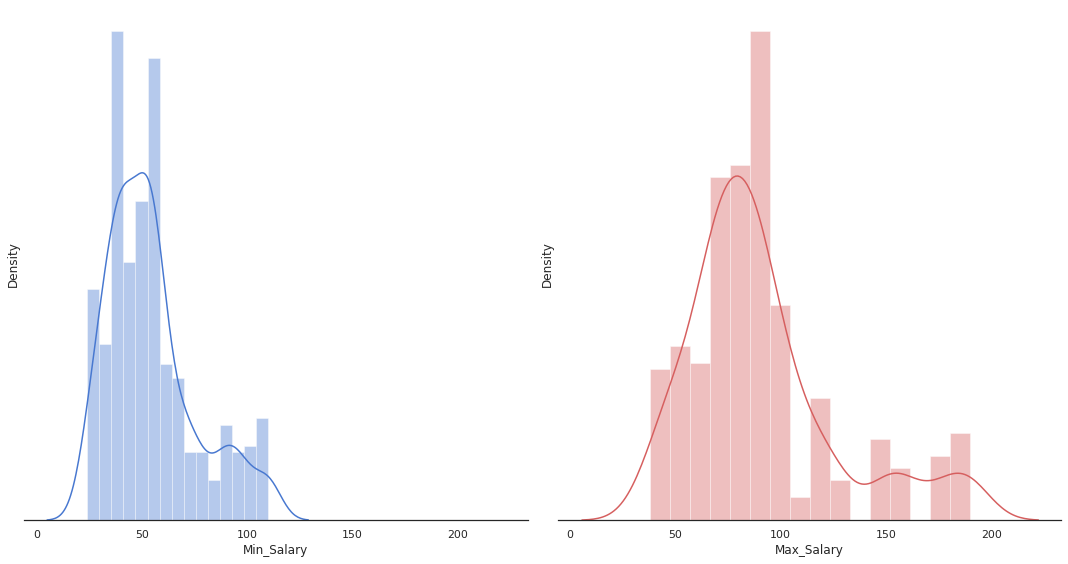

In [42]:
data_analyst = data[data['Job Title']=='Data Analyst']


sns.set(style="white", palette="muted", color_codes=True)


f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.despine(left=True)

#Plot a histogram and kernel density estimate

sns.distplot(data_analyst['Min_Salary'], color="b", ax=axes[0])

sns.distplot(data_analyst['Max_Salary'], color="r",ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



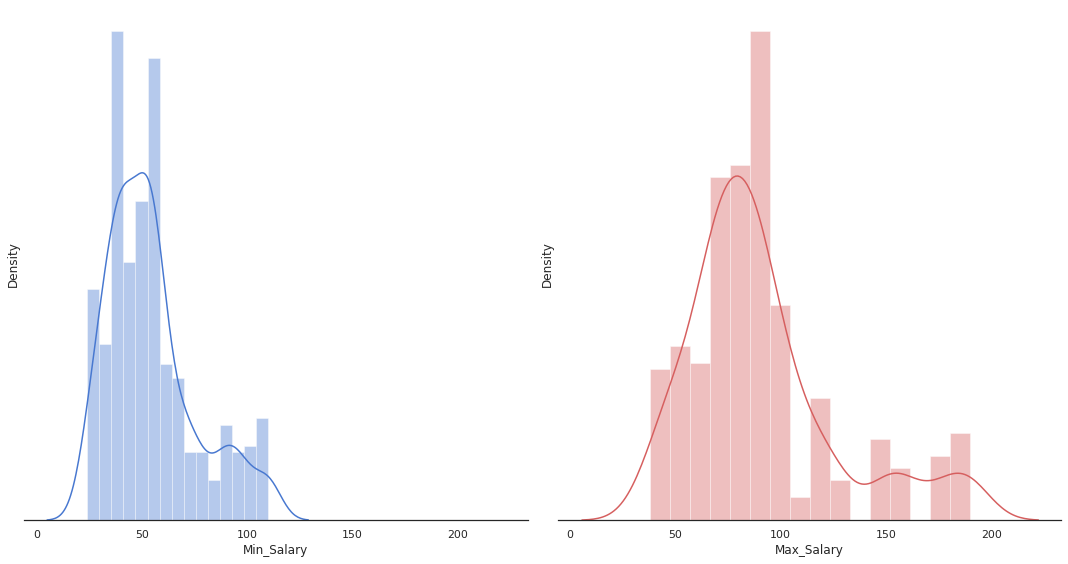

In [53]:
data_analyst = df2[df2['Job Title']=='Data Analyst']


sns.set(style="white", palette="muted", color_codes=True)


f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.despine(left=True)

#Plot a histogram and kernel density estimate

sns.distplot(data_analyst['Min_Salary'], color="b", ax=axes[0])

sns.distplot(data_analyst['Max_Salary'], color="r",ax=axes[1])

plt.setp(axes, yticks=[])
plt.tight_layout()